## REAL TIME ELECTION

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, 
in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

#### LOAD DATA SET

In [2]:
df = pd.read_csv('election_data.csv')
df.head()

TimeElapsed              time       territoryName  totalMandates  \
0            0  06-10-2019 20:10  Territory National              0   
1            0  06-10-2019 20:10  Territory National              0   
2            0  06-10-2019 20:10  Territory National              0   
3            0  06-10-2019 20:10  Territory National              0   
4            0  06-10-2019 20:10  Territory National              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  nullVotesPercentage  votersPercentage  \
0                   2.5       8874                  2.3             51.36   
1                   2.5       8874                  2.3             51.36   
2                   2.5       8874                  2.3             51.36   
3                   2.5       8874                  2.3             51.36   
4                   2.5       8874                  2.3             51.36   

   subscribedVoters  totalVoters  pre.blankVotes  pre.blankVotesPercentage  \
0            752529       386497            8317                      1.94   
1            752529       386497            8317                      1.94   
2            752529       386497            8317                      1.94   
3            752529       386497            8317                      1.94   
4            752529       386497            8317                      1.94   

   pre.nullVotes  pre.nullVotesPercentage  pre.votersPercentage  \
0           8171                     1.91                 52.66   
1           8171                     1.91                 52.66   
2           8171                     1.91                 52.66   
3           8171                     1.91                 52.66   
4           8171                     1.91                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12

In [3]:
df.info()
#THERE IS NO NULL VALUES IN DATASET
#ONLY 3 COLUMNS IN OBJECTIVE FORM
#REMAININIG COLUMNS IN INT OF FLOAT FORM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               1213 non-null   int64  
 1   time                      1213 non-null   object 
 2   territoryName             1213 non-null   object 
 3   totalMandates             1213 non-null   int64  
 4   availableMandates         1213 non-null   int64  
 5   numParishes               1213 non-null   int64  
 6   numParishesApproved       1213 non-null   int64  
 7   blankVotes                1213 non-null   int64  
 8   blankVotesPercentage      1213 non-null   float64
 9   nullVotes                 1213 non-null   int64  
 10  nullVotesPercentage       1213 non-null   float64
 11  votersPercentage          1213 non-null   float64
 12  subscribedVoters          1213 non-null   int64  
 13  totalVoters               1213 non-null   int64  
 14  pre.blan

In [4]:
df.shape
#WE HAVE TOTAL 1213 COUNTS AND 28 VARIABLE

(1213, 28)

In [5]:
df.isnull().sum()
# NO NULL VALUES IN DATASET

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [6]:
df.describe()

TimeElapsed  totalMandates  availableMandates  numParishes  \
count  1213.000000         1213.0        1213.000000  1213.000000   
mean      5.453421            0.0          26.870569   358.355317   
std       4.500698            0.0          55.618238   750.239047   
min       0.000000            0.0           2.000000    54.000000   
25%       0.000000            0.0           4.000000    75.000000   
50%       5.000000            0.0           9.000000   147.000000   
75%      10.000000            0.0          18.000000   242.000000   
max      15.000000            0.0         226.000000  3092.000000   

       numParishesApproved   blankVotes  blankVotesPercentage    nullVotes  \
count          1213.000000  1213.000000           1213.000000  1213.000000   
mean            111.887881   926.678483              2.411319   868.944765   
std             236.571623  1937.646076              0.751206  1820.497416   
min               3.000000    19.000000              0.550000    39.000000   
25%              12.000000   138.000000              1.910000   117.000000   
50%              23.000000   268.000000              2.490000   230.000000   
75%              96.000000   735.000000              2.890000   740.000000   
max            1081.000000  9652.000000              3.870000  8874.000000   

       nullVotesPercentage  votersPercentage  subscribedVoters    totalVoters  \
count          1213.000000       1213.000000       1213.000000    1213.000000   
mean              2.183735         51.861204      72650.773289   36945.459192   
std               0.514144          3.959896     152555.910698   77580.894705   
min               1.340000         42.880000       5767.000000    2833.000000   
25%               1.840000         49.120000      13439.000000    7302.000000   
50%               2.160000         52.240000      20899.000000   10728.000000   
75%               2.490000         55.330000      53691.000000   29494.000000   
max               3.350000         57.360000     752529.000000  386497.000000   

       pre.blankVotes  pre.blankVotesPercentage  pre.nullVotes  \
count     1213.000000               1213.000000    1213.000000   
mean       797.328937                  1.858145     794.191261   
std       1669.928161                  0.502448    1666.549301   
min         32.000000                  1.000000      40.000000   
25%        124.000000                  1.370000     111.000000   
50%        250.000000                  1.910000     213.000000   
75%        648.000000                  2.040000     590.000000   
max       8317.000000                  3.070000    8171.000000   

       pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
count              1213.000000           1213.000000           1213.000000   
mean                  1.876340             54.099275          79257.338829   
std                   0.466179              4.876772         166293.969636   
min                   1.140000             45.140000           6383.000000   
25%                   1.630000             50.380000          14191.000000   
50%                   1.910000             55.080000          22356.000000   
75%                   2.050000             57.400000          57540.000000   
max                   3.120000             62.580000         813743.000000   

       pre.totalVoters  Mandates   Percentage  validVotesPercentage  \
count      1213.000000    1213.0  1213.000000           1213.000000   
mean      41343.248969       0.0     4.956059              5.193355   
std       86681.128053       0.0    10.931462             11.456085   
min        3215.000000       0.0     0.020000              0.020000   
25%        8146.000000       0.0     0.220000              0.220000   
50%       12251.000000       0.0     0.520000              0.540000   
75%       31957.000000       0.0     2.390000              2.500000   
max      428546.000000       0.0    49.110000             51.420000   

              

In [7]:
df.head()

TimeElapsed              time       territoryName  totalMandates  \
0            0  06-10-2019 20:10  Territory National              0   
1            0  06-10-2019 20:10  Territory National              0   
2            0  06-10-2019 20:10  Territory National              0   
3            0  06-10-2019 20:10  Territory National              0   
4            0  06-10-2019 20:10  Territory National              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  nullVotesPercentage  votersPercentage  \
0                   2.5       8874                  2.3             51.36   
1                   2.5       8874                  2.3             51.36   
2                   2.5       8874                  2.3             51.36   
3                   2.5       8874                  2.3             51.36   
4                   2.5       8874                  2.3             51.36   

   subscribedVoters  totalVoters  pre.blankVotes  pre.blankVotesPercentage  \
0            752529       386497            8317                      1.94   
1            752529       386497            8317                      1.94   
2            752529       386497            8317                      1.94   
3            752529       386497            8317                      1.94   
4            752529       386497            8317                      1.94   

   pre.nullVotes  pre.nullVotesPercentage  pre.votersPercentage  \
0           8171                     1.91                 52.66   
1           8171                     1.91                 52.66   
2           8171                     1.91                 52.66   
3           8171                     1.91                 52.66   
4           8171                     1.91                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12

In [8]:
df['TimeElapsed'].unique()

array([ 0,  5, 10, 15], dtype=int64)

In [10]:
df['time'].unique()

array(['06-10-2019 20:10', '06-10-2019 20:15', '06-10-2019 20:20',
       '06-10-2019 20:25'], dtype=object)

In [12]:
df[['DAY','TIME']] = df.time.str.split("2019",expand=True)

In [13]:
df

TimeElapsed              time       territoryName  totalMandates  \
0               0  06-10-2019 20:10  Territory National              0   
1               0  06-10-2019 20:10  Territory National              0   
2               0  06-10-2019 20:10  Territory National              0   
3               0  06-10-2019 20:10  Territory National              0   
4               0  06-10-2019 20:10  Territory National              0   
5               0  06-10-2019 20:10  Territory National              0   
6               0  06-10-2019 20:10  Territory National              0   
7               0  06-10-2019 20:10  Territory National              0   
8               0  06-10-2019 20:10  Territory National              0   
9               0  06-10-2019 20:10  Territory National              0   
10              0  06-10-2019 20:10  Territory National              0   
11              0  06-10-2019 20:10  Territory National              0   
12              0  06-10-2019 20:10  Territory National              0   
13              0  06-10-2019 20:10  Territory National              0   
14              0  06-10-2019 20:10  Territory National              0   
15              0  06-10-2019 20:10  Territory National              0   
16              0  06-10-2019 20:10  Territory National              0   
17              0  06-10-2019 20:10  Territory National              0   
18              0  06-10-2019 20:10  Territory National              0   
19              0  06-10-2019 20:10  Territory National              0   
20              0  06-10-2019 20:10  Territory National              0   
21              0  06-10-2019 20:10              Aveiro              0   
22              0  06-10-2019 20:10              Aveiro              0   
23              0  06-10-2019 20:10              Aveiro              0   
24              0  06-10-2019 20:10              Aveiro              0   
25              0  06-10-2019 20:10              Aveiro              0   
26              0  06-10-2019 20:10              Aveiro              0   
27              0  06-10-2019 20:10              Aveiro              0   
28              0  06-10-2019 20:10              Aveiro              0   
29              0  06-10-2019 20:10              Aveiro              0   
30              0  06-10-2019 20:10              Aveiro              0   
31              0  06-10-2019 20:10              Aveiro              0   
32              0  06-10-2019 20:10              Aveiro              0   
33              0  06-10-2019 20:10              Aveiro              0   
34              0  06-10-2019 20:10              Aveiro              0   
35              0  06-10-2019 20:10              Aveiro              0   
36              0  06-10-2019 20:10              Aveiro              0   
37              0  06-10-2019 20:10              Aveiro              0   
38              0  06-10-2019 20:10              Aveiro              0   
39              0  06-10-2019 20:10              Aveiro              0   
40              0  06-10-2019 20:10              Aveiro              0   
41              0  06-10-2019 20:10                Beja              0   
42              0  06-10-2019 20:10                Beja              0   
43              0  06-10-2019 20:10                Beja              0   
44              0  06-10-2019 20:10                Beja              0   
45              0  06-10-2019 20:10                Beja              0   
46              0  06-10-2019 20:10                Beja              0   
47              0  06-10-2019 20:10                Beja              0   
48              0  06-10-2019 20:10                Beja              0   
49              0  06-10-2019 20:10                Beja              0   
50              0  06-10-2019 20:10                Beja              0   
51              0  06-10-2019 20:10                Beja              0   
52              0  06-10-2019 20:10                Beja              0   
53        

In [14]:
df = df.drop(['time','DAY'], axis = 1)


In [15]:
df.head()

TimeElapsed       territoryName  totalMandates  availableMandates  \
0            0  Territory National              0                226   
1            0  Territory National              0                226   
2            0  Territory National              0                226   
3            0  Territory National              0                226   
4            0  Territory National              0                226   

   numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0         3092                 1081        9652                   2.5   
1         3092                 1081        9652                   2.5   
2         3092                 1081        9652                   2.5   
3         3092                 1081        9652                   2.5   
4         3092                 1081        9652                   2.5   

   nullVotes  nullVotesPercentage  votersPercentage  subscribedVoters  \
0       8874                  2.3             51.36            752529   
1       8874                  2.3             51.36            752529   
2       8874                  2.3             51.36            752529   
3       8874                  2.3             51.36            752529   
4       8874                  2.3             51.36            752529   

   totalVoters  pre.blankVotes  pre.blankVotesPercentage  pre.nullVotes  \
0       386497            8317                      1.94           8171   
1       386497            8317                      1.94           8171   
2       386497            8317                      1.94           8171   
3       386497            8317                      1.94           8171   
4       386497            8317                      1.94           8171   

   pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
0                     1.91                 52.66                813743   
1                     1.91                 52.66                813743   
2                     1.91                 52.66                813743   
3                     1.91                 52.66                813743   
4                     1.91                 52.66                813743   

   pre.totalVoters    Party  Mandates  Percentage  validVotesPercentage  \
0           428546       PS         0       38.29                 40.22   
1           428546  PPD/PSD         0       33.28                 34.95   
2           428546     B.E.         0        6.81                  7.15   
3           428546   CDS-PP         0        4.90                  5.14   
4           428546  PCP-PEV         0        4.59                  4.83   

    Votes  Hondt  FinalMandates    TIME  
0  147993     94            106   20:10  
1  128624     81             77   20:10  
2   26307     16             19   20:10  
3   18923     12              5   20:10  
4   17757     11             12   20:10

In [16]:
df.territoryName.unique()

array(['Territory National', 'Aveiro', 'Beja', 'Braga', 'Bragana',
       'Castelo Branco', 'Coimbra', 'Avora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santaraam', 'Setabal',
       'Viana do Castelo', 'Vila Real', 'Viseu'], dtype=object)

In [17]:
df.Party.unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [18]:
df1 = df[df.TimeElapsed == 0]
df2 = df[df.TimeElapsed == 5]
df3 = df[df.TimeElapsed == 10]
df4 = df[df.TimeElapsed == 15]
df1

TimeElapsed       territoryName  totalMandates  availableMandates  \
0              0  Territory National              0                226   
1              0  Territory National              0                226   
2              0  Territory National              0                226   
3              0  Territory National              0                226   
4              0  Territory National              0                226   
5              0  Territory National              0                226   
6              0  Territory National              0                226   
7              0  Territory National              0                226   
8              0  Territory National              0                226   
9              0  Territory National              0                226   
10             0  Territory National              0                226   
11             0  Territory National              0                226   
12             0  Territory National              0                226   
13             0  Territory National              0                226   
14             0  Territory National              0                226   
15             0  Territory National              0                226   
16             0  Territory National              0                226   
17             0  Territory National              0                226   
18             0  Territory National              0                226   
19             0  Territory National              0                226   
20             0  Territory National              0                226   
21             0              Aveiro              0                 16   
22             0              Aveiro              0                 16   
23             0              Aveiro              0                 16   
24             0              Aveiro              0                 16   
25             0              Aveiro              0                 16   
26             0              Aveiro              0                 16   
27             0              Aveiro              0                 16   
28             0              Aveiro              0                 16   
29             0              Aveiro              0                 16   
30             0              Aveiro              0                 16   
31             0              Aveiro              0                 16   
32             0              Aveiro              0                 16   
33             0              Aveiro              0                 16   
34             0              Aveiro              0                 16   
35             0              Aveiro              0                 16   
36             0              Aveiro              0                 16   
37             0              Aveiro              0                 16   
38             0              Aveiro              0                 16   
39             0              Aveiro              0                 16   
40             0              Aveiro              0                 16   
41             0                Beja              0                  3   
42             0                Beja              0                  3   
43             0                Beja              0                  3   
44             0                Beja              0                  3   
45             0                Beja              0                  3   
46             0                Beja              0                  3   
47             0                Beja              0                  3   
48             0                Beja              0                  3   
49             0                Beja              0                  3   
50             0                Beja              0                  3   
51             0                Beja              0                  3   
52             0                Beja              0                  3   
53       

In [19]:
df1.shape

(386, 28)

In [20]:
k = [df1,df2,df3,df4]

for i in k:
    plt.figure(figsize = (18,6))
    sns.barplot(x = 'Party', y = 'validVotesPercentage', data = i, palette= 'GnBu_d').set_title('vote-party')
    plt.xticks
    plt.show()

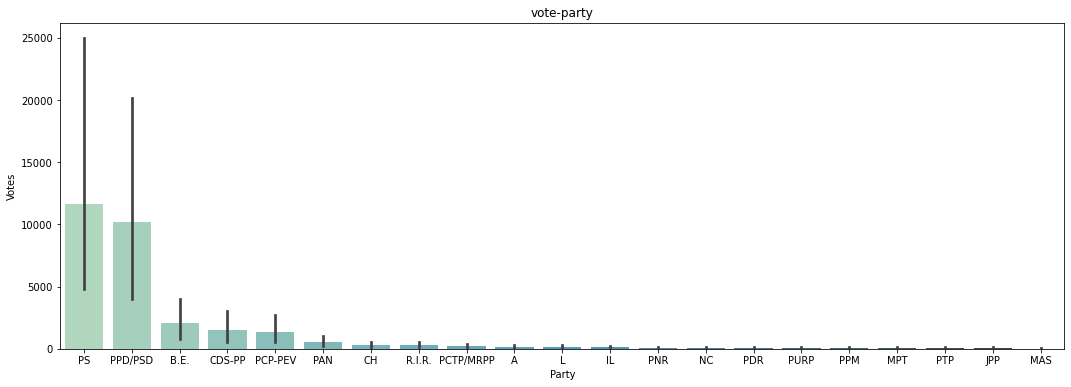

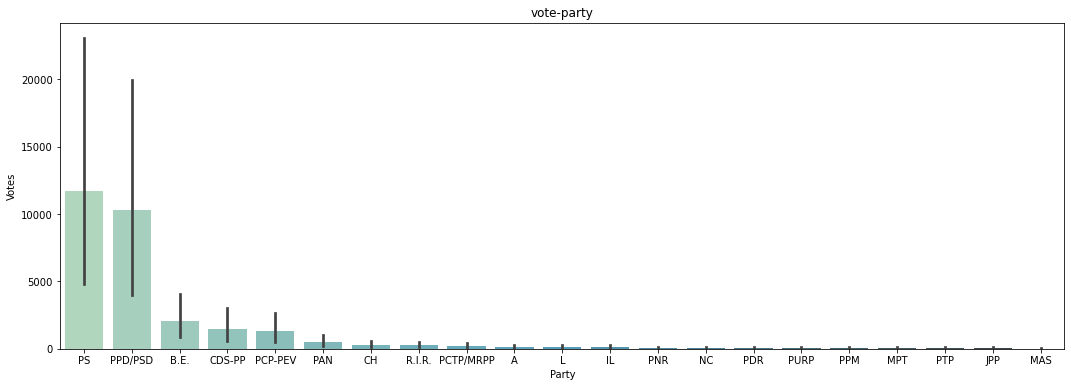

In [21]:
k = [df1,df2,df3,df4]

for i in k:
    plt.figure(figsize = (18,6))
    sns.barplot(x = 'Party', y = 'Votes', data = i, palette= 'GnBu_d').set_title('vote-party')
    plt.xticks
    plt.show()

CONCLUSION:
    
VALID VOTE PERCENTAGE IS HIGHER IN THE FAVOUR OF PARTY 'PS','PPD/PSD' AND APART FROM IT 2-3 PARTIES HAVE VALID VOTE PERCENTAGE.


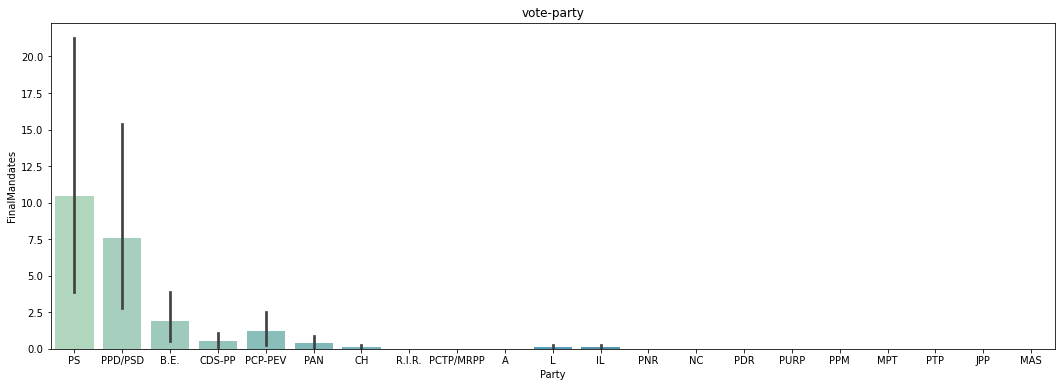

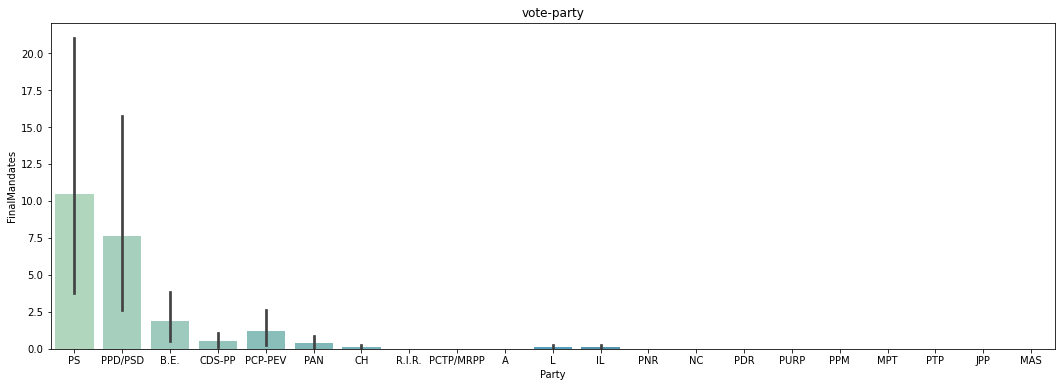

In [22]:
k = [df1,df2,df3,df4]

for i in k:
    plt.figure(figsize = (18,6))
    sns.barplot(x = 'Party', y = 'FinalMandates', data = i, palette= 'GnBu_d').set_title('vote-party')
    plt.xticks
    plt.show()

CONCLUSION:
    
    1)IN ALL 4 TIME TRENDS, OBSERVATION IS LOOKING AS AS PS IS LEADING PARTY, ON SECOND POSITION, PPD/PSD
    2)SLIGHT COMPETATION BETWEEN B.E AND PCP-PEV

In [23]:
df.columns

Index(['TimeElapsed', 'territoryName', 'totalMandates', 'availableMandates',
       'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates', 'TIME'],
      dtype='object')

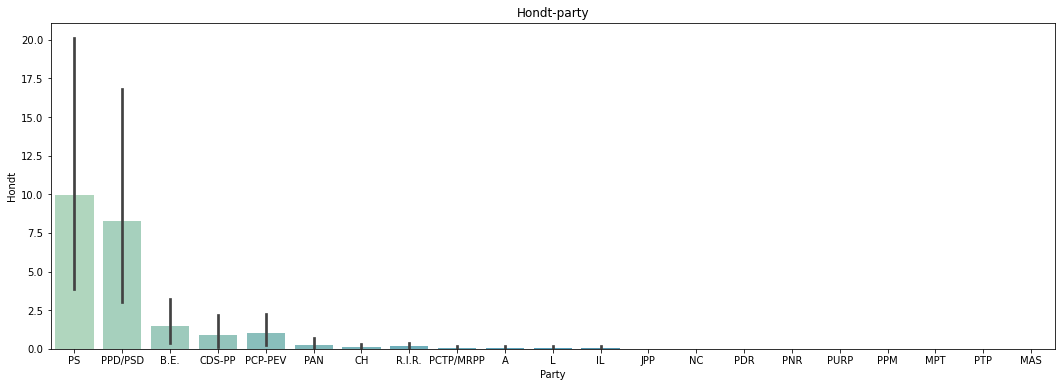

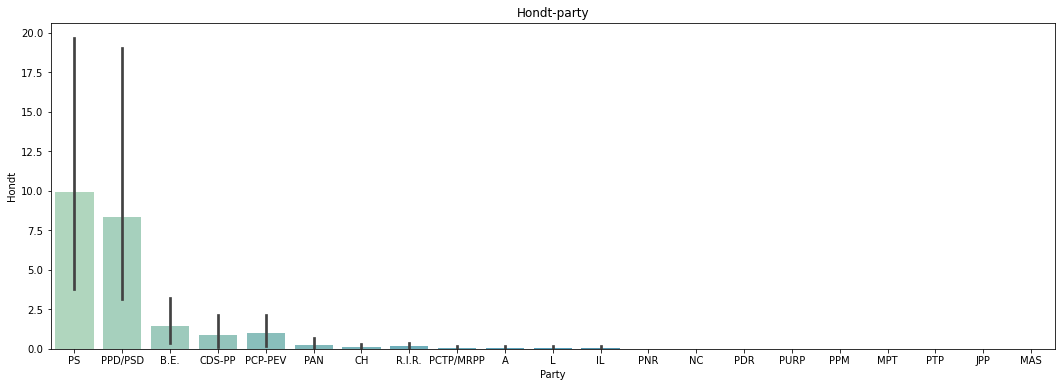

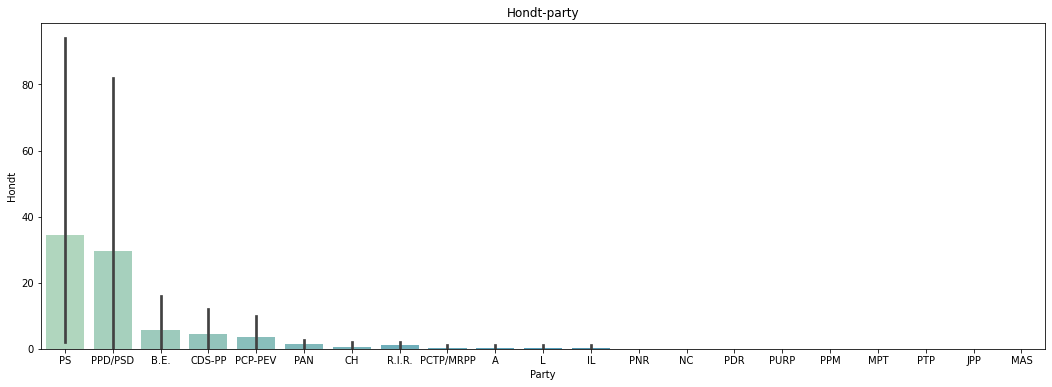

In [24]:
k = [df1,df2,df3,df4]

for i in k:
    plt.figure(figsize = (18,6))
    sns.barplot(x = 'Party', y = 'Hondt', data = i, palette= 'GnBu_d').set_title('Hondt-party')
    plt.xticks
    plt.show()

CONCLUSION:
    
    PS is leading party in all 4 time trend and ppd/psd is on 2nd position.
    BE is on 3rd position in all time trend.
    comperation between cds-pp and pcp-pev in 3 time trends but in 4th trend, cds-pp leads.

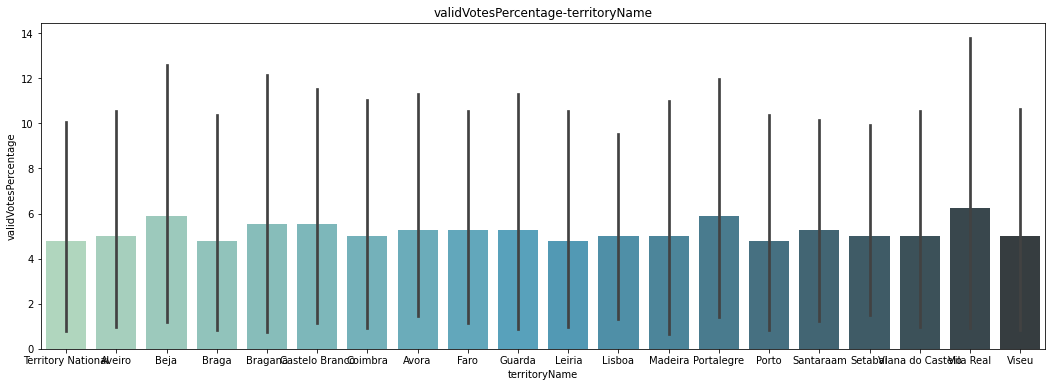

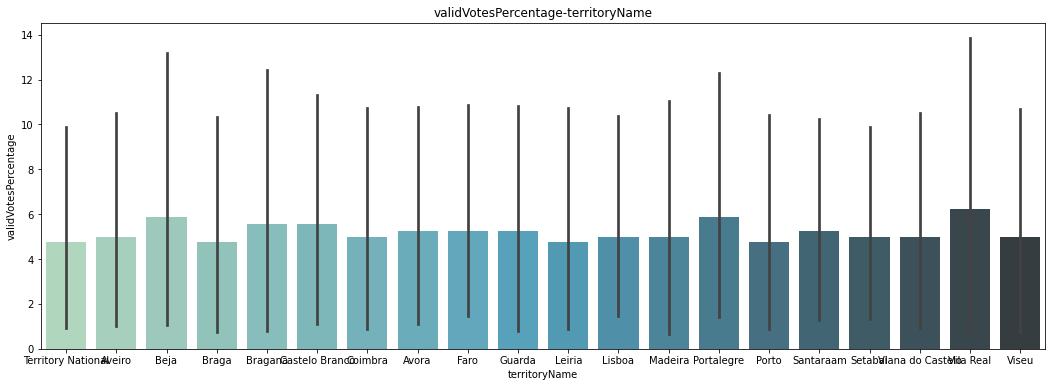

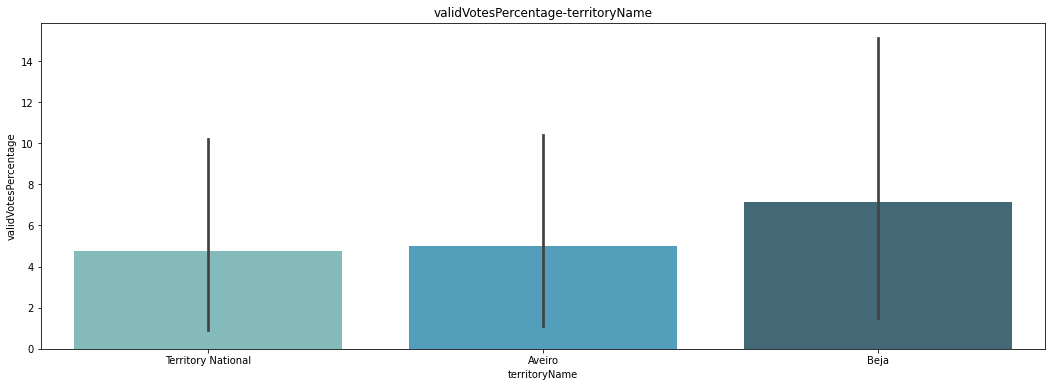

In [25]:
k = [df1,df2,df3,df4]

for i in k:
    plt.figure(figsize = (18,6))
    sns.barplot(x = 'territoryName', y = 'validVotesPercentage', data = i, palette= 'GnBu_d').set_title('validVotesPercentage-territoryName')
    plt.xticks
    plt.show()

conclusion:
    
    in last time trend, only 3 cities are their for valid vote percentage.
    in first 3 time trend,there are all nearly same.

In [26]:
df.head(2)

TimeElapsed       territoryName  totalMandates  availableMandates  \
0            0  Territory National              0                226   
1            0  Territory National              0                226   

   numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0         3092                 1081        9652                   2.5   
1         3092                 1081        9652                   2.5   

   nullVotes  nullVotesPercentage  votersPercentage  subscribedVoters  \
0       8874                  2.3             51.36            752529   
1       8874                  2.3             51.36            752529   

   totalVoters  pre.blankVotes  pre.blankVotesPercentage  pre.nullVotes  \
0       386497            8317                      1.94           8171   
1       386497            8317                      1.94           8171   

   pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
0                     1.91                 52.66                813743   
1                     1.91                 52.66                813743   

   pre.totalVoters    Party  Mandates  Percentage  validVotesPercentage  \
0           428546       PS         0       38.29                 40.22   
1           428546  PPD/PSD         0       33.28                 34.95   

    Votes  Hondt  FinalMandates    TIME  
0  147993     94            106   20:10  
1  128624     81             77   20:10

In [27]:
df1.nunique()

TimeElapsed                   1
territoryName                20
totalMandates                 1
availableMandates            14
numParishes                  19
numParishesApproved          16
blankVotes                   20
blankVotesPercentage         19
nullVotes                    20
nullVotesPercentage          19
votersPercentage             20
subscribedVoters             20
totalVoters                  20
pre.blankVotes               20
pre.blankVotesPercentage     18
pre.nullVotes                19
pre.nullVotesPercentage      19
pre.votersPercentage         20
pre.subscribedVoters         20
pre.totalVoters              20
Party                        21
Mandates                      1
Percentage                  201
validVotesPercentage        208
Votes                       235
Hondt                        17
FinalMandates                17
TIME                          1
dtype: int64

In [28]:
df = df.drop(['TIME','Mandates','totalMandates'], axis = 1)

In [29]:
df.head(4)

TimeElapsed       territoryName  availableMandates  numParishes  \
0            0  Territory National                226         3092   
1            0  Territory National                226         3092   
2            0  Territory National                226         3092   
3            0  Territory National                226         3092   

   numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \
0                 1081        9652                   2.5       8874   
1                 1081        9652                   2.5       8874   
2                 1081        9652                   2.5       8874   
3                 1081        9652                   2.5       8874   

   nullVotesPercentage  votersPercentage  subscribedVoters  totalVoters  \
0                  2.3             51.36            752529       386497   
1                  2.3             51.36            752529       386497   
2                  2.3             51.36            752529       386497   
3                  2.3             51.36            752529       386497   

   pre.blankVotes  pre.blankVotesPercentage  pre.nullVotes  \
0            8317                      1.94           8171   
1            8317                      1.94           8171   
2            8317                      1.94           8171   
3            8317                      1.94           8171   

   pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
0                     1.91                 52.66                813743   
1                     1.91                 52.66                813743   
2                     1.91                 52.66                813743   
3                     1.91                 52.66                813743   

   pre.totalVoters    Party  Percentage  validVotesPercentage   Votes  Hondt  \
0           428546       PS       38.29                 40.22  147993     94   
1           428546  PPD/PSD       33.28                 34.95  128624     81   
2           428546     B.E.        6.81                  7.15   26307     16   
3           428546   CDS-PP        4.90                  5.14   18923     12   

   FinalMandates  
0            106  
1             77  
2             19  
3              5

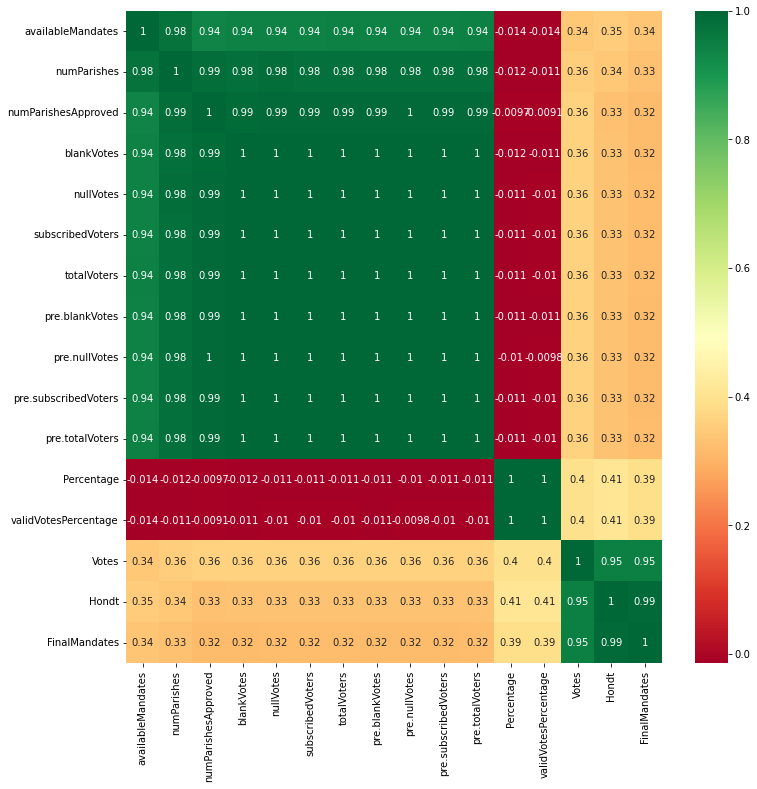

In [32]:
corrmat = df.corr()
plt.figure(figsize=(12,12))
top_corr_features = corrmat.index[abs(corrmat["FinalMandates"])>0.2]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

 blank votes,null votes,subscribed votes,total voteres, pre blank voters,num parishe and available mendats are fully co-related wit each other.
 this all have negative co-relation with percentage and valid votes percentage.
 target have highly co-relation with hondt and votes.
    
    

In [31]:
corrmat = df.corr()
plt.figure(figsize=(12,12))
top_corr_features = corrmat.index[abs(corrmat["FinalMandates"])>0.4]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
df.head(2)

TimeElapsed       territoryName  availableMandates  numParishes  \
0            0  Territory National                226         3092   
1            0  Territory National                226         3092   

   numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \
0                 1081        9652                   2.5       8874   
1                 1081        9652                   2.5       8874   

   nullVotesPercentage  votersPercentage  subscribedVoters  totalVoters  \
0                  2.3             51.36            752529       386497   
1                  2.3             51.36            752529       386497   

   pre.blankVotes  pre.blankVotesPercentage  pre.nullVotes  \
0            8317                      1.94           8171   
1            8317                      1.94           8171   

   pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
0                     1.91                 52.66                813743   
1                     1.91                 52.66                813743   

   pre.totalVoters    Party  Percentage  validVotesPercentage   Votes  Hondt  \
0           428546       PS       38.29                 40.22  147993     94   
1           428546  PPD/PSD       33.28                 34.95  128624     81   

   FinalMandates  
0            106  
1             77

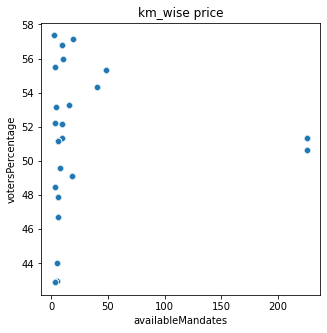

In [35]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=df, x="availableMandates", y="votersPercentage").set_title('km_wise price')
plt.xticks
plt.show()

VOTING PERCENTAGE HIGH WHERE AVAILABLE MANDATES IS HIGH

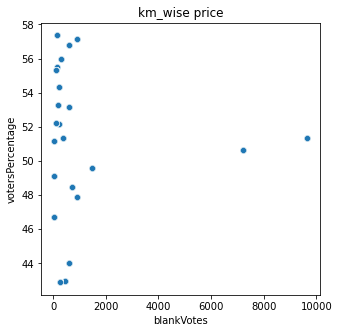

In [36]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=df, x="blankVotes", y="votersPercentage").set_title('km_wise price')
plt.xticks
plt.show()

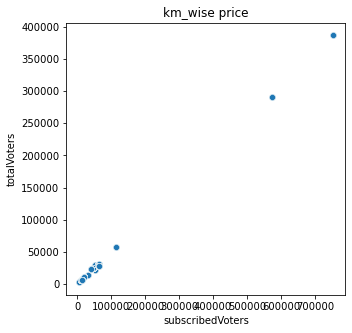

In [37]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=df, x="subscribedVoters", y="totalVoters").set_title('km_wise price')
plt.xticks
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["territoryName"]= le.fit_transform(df["territoryName"])
df["Party"]= le.fit_transform(df["Party"])

As subscribed voters increases than total voter also increases

In [41]:
df

TimeElapsed  territoryName  availableMandates  numParishes  \
0               0             16                226         3092   
1               0             16                226         3092   
2               0             16                226         3092   
3               0             16                226         3092   
4               0             16                226         3092   
5               0             16                226         3092   
6               0             16                226         3092   
7               0             16                226         3092   
8               0             16                226         3092   
9               0             16                226         3092   
10              0             16                226         3092   
11              0             16                226         3092   
12              0             16                226         3092   
13              0             16                226         3092   
14              0             16                226         3092   
15              0             16                226         3092   
16              0             16                226         3092   
17              0             16                226         3092   
18              0             16                226         3092   
19              0             16                226         3092   
20              0             16                226         3092   
21              0              0                 16          147   
22              0              0                 16          147   
23              0              0                 16          147   
24              0              0                 16          147   
25              0              0                 16          147   
26              0              0                 16          147   
27              0              0                 16          147   
28              0              0                 16          147   
29              0              0                 16          147   
30              0              0                 16          147   
31              0              0                 16          147   
32              0              0                 16          147   
33              0              0                 16          147   
34              0              0                 16          147   
35              0              0                 16          147   
36              0              0                 16          147   
37              0              0                 16          147   
38              0              0                 16          147   
39              0              0                 16          147   
40              0              0                 16          147   
41              0              2                  3           75   
42              0              2                  3           75   
43              0              2                  3           75   
44              0              2                  3           75   
45              0              2                  3           75   
46              0              2                  3           75   
47              0              2                  3           75   
48              0              2                  3           75   
49              0              2                  3           75   
50              0              2                  3           75   
51              0              2                  3           75   
52              0              2                  3           75   
53              0              2                  3           75   
54              0              2                  3           75   
55              0              2                  3           75   
56              0              2                  3           75   
57              0              2                  3           

In [43]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<4).all(axis=1)]
print(df_1.shape)

(1213, 25)
(1181, 25)


In [44]:
df_1.skew()

TimeElapsed                 0.166233
territoryName               0.023903
availableMandates           3.809536
numParishes                 4.108603
numParishesApproved         3.817286
blankVotes                  3.841799
blankVotesPercentage       -0.307740
nullVotes                   3.838415
nullVotesPercentage         0.367506
votersPercentage           -0.590148
subscribedVoters            3.880582
totalVoters                 3.897201
pre.blankVotes              3.842806
pre.blankVotesPercentage    0.282571
pre.nullVotes               3.855064
pre.nullVotesPercentage     0.522092
pre.votersPercentage       -0.340070
pre.subscribedVoters        3.867012
pre.totalVoters             3.902958
Party                      -0.065322
Percentage                  2.771521
validVotesPercentage        2.770873
Votes                       4.712045
Hondt                       5.403962
FinalMandates               5.449976
dtype: float64

In [45]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=2:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -1.8:
        df_1[col]=np.power(df_1[col],2)

In [48]:
df_1.head()

TimeElapsed  territoryName  availableMandates  numParishes  \
21            0              0           2.519842     5.277632   
22            0              0           2.519842     5.277632   
23            0              0           2.519842     5.277632   
24            0              0           2.519842     5.277632   
25            0              0           2.519842     5.277632   

    numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \
21             2.289428    5.708267                  2.92    4.65701   
22             2.289428    5.708267                  2.92    4.65701   
23             2.289428    5.708267                  2.92    4.65701   
24             2.289428    5.708267                  2.92    4.65701   
25             2.289428    5.708267                  2.92    4.65701   

    nullVotesPercentage  votersPercentage  subscribedVoters  totalVoters  \
21                 1.59              53.3         22.864356     18.53827   
22                 1.59              53.3         22.864356     18.53827   
23                 1.59              53.3         22.864356     18.53827   
24                 1.59              53.3         22.864356     18.53827   
25                 1.59              53.3         22.864356     18.53827   

    pre.blankVotes  pre.blankVotesPercentage  pre.nullVotes  \
21        4.986631                      1.82       4.805896   
22        4.986631                      1.82       4.805896   
23        4.986631                      1.82       4.805896   
24        4.986631                      1.82       4.805896   
25        4.986631                      1.82       4.805896   

    pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
21                     1.63                 54.56              23.21475   
22                     1.63                 54.56              23.21475   
23                     1.63                 54.56              23.21475   
24                     1.63                 54.56              23.21475   
25                     1.63                 54.56              23.21475   

    pre.totalVoters  Party  Percentage  validVotesPercentage      Votes  \
21         18.96948     15    3.354586              3.406504  13.397950   
22         18.96948     17    3.250059              3.300398  12.980246   
23         18.96948      1    1.954820              1.984886   7.807925   
24         18.96948      2    1.831145              1.859532   7.312383   
25         18.96948     11    1.337004              1.357209   5.336803   

       Hondt  FinalMandates  
21  1.912931       1.817121  
22  1.912931       1.912931  
23  1.000000       1.259921  
24  1.000000       1.000000  
25  0.000000       0.000000

In [49]:
x =df_1.drop('FinalMandates',axis=1)
y =df_1['FinalMandates']

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [53]:
vif

VIF Factor                  features
0   2.840640e+00               TimeElapsed
1   1.582222e+01             territoryName
2   4.076781e+02         availableMandates
3   1.932840e+03               numParishes
4   1.681035e+03       numParishesApproved
5   3.299711e+04                blankVotes
6   2.656086e+03      blankVotesPercentage
7   2.036185e+04                 nullVotes
8   1.962326e+03       nullVotesPercentage
9   6.394343e+04          votersPercentage
10  7.043784e+05          subscribedVoters
11  1.006456e+06               totalVoters
12  3.406760e+04            pre.blankVotes
13  2.191547e+03  pre.blankVotesPercentage
14  1.315914e+04             pre.nullVotes
15  7.538299e+02   pre.nullVotesPercentage
16  6.031501e+04      pre.votersPercentage
17  5.819362e+05      pre.subscribedVoters
18  9.417866e+05           pre.totalVoters
19  3.806175e+00                     Party
20  1.044947e+05                Percentage
21  1.057599e+05      validVotesPercentage
22  3.571831e+01                     Votes
23  4.608199e+00                     Hondt

In [55]:
x = x.drop(['numParishes','blankVotes','nullVotes','subscribedVoters','pre.votersPercentage','pre.blankVotes','pre.nullVotes','Percentage'], axis = 1)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.7)

In [58]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [59]:
pca = PCA(n_components = 12)
new_data = pca.fit_transform(x_scaled)
pri_x = pd.DataFrame(new_data)
pri_x

0         1         2         3         4         5         6  \
0    -0.885031  4.456743  1.282303 -0.321171 -0.684274  0.173847  0.785536   
1    -0.910525  4.368329  1.273210 -0.330721 -0.949080 -0.042602  0.793397   
2    -1.435573  1.759786  0.904530 -0.632461  0.851969  1.489171  0.767628   
3    -1.465554  1.633780  0.889343 -0.652148  0.707550  1.374234  0.769084   
4    -1.823084  0.250636  0.709419 -0.626799 -0.443113  0.398442  0.924575   
5    -1.839211  0.157500  0.696093 -0.647062 -0.330879  0.495399  0.916510   
6    -1.863793  0.204646  0.714285 -0.605626 -1.583063 -0.546709  0.970552   
7    -1.943933 -0.308263  0.637882 -0.725404 -0.651092  0.247998  0.913041   
8    -1.944272 -0.459131  0.607360 -0.782467  0.459976  1.177017  0.861240   
9    -1.946154 -0.450072  0.609783 -0.777529  0.335368  1.073145  0.866673   
10   -1.966492 -0.614323  0.583541 -0.820611  0.814923  1.478081  0.840799   
11   -1.967537 -0.520349  0.603016 -0.783774  0.073250  0.858199  0.875170   
12   -1.984376 -0.469182  0.619320 -0.748174 -0.926521  0.025616  0.918809   
13   -1.996675 -0.492509  0.618752 -0.745855 -1.181809 -0.185519  0.928481   
14   -2.007852 -0.496381  0.621867 -0.736708 -1.560111 -0.499631  0.944146   
15   -2.010225 -0.674361  0.586586 -0.801999 -0.327096  0.531773  0.886332   
16   -2.025332 -0.598443  0.607320 -0.758602 -1.449145 -0.403379  0.935972   
17   -2.028404 -0.773615  0.572550 -0.823373 -0.215824  0.628188  0.877850   
18   -2.033881 -0.851531  0.558731 -0.847433  0.150512  0.935618  0.859886   
19   -2.048795 -0.787467  0.576802 -0.809477 -0.847430  0.104051  0.903674   
20   -1.050273  4.373119 -0.328109  0.359288 -0.628522 -0.221221  1.580405   
21   -1.279785  3.243808 -0.484711  0.198171  0.009066  0.334082  1.552694   
22   -1.704165  1.479928 -0.719753  0.137712 -0.568288 -0.150170  1.669177   
23   -1.756013  1.007939 -0.797952  0.005695  1.125074  1.275427  1.581017   
24   -1.938288  0.341332 -0.870965 -0.079681 -0.358182  0.069945  1.617561   
25   -1.941205  0.162392 -0.906331 -0.145145  0.874665  1.101252  1.559614   
26   -1.966788  0.059913 -0.918395 -0.160540  0.733656  0.988216  1.561612   
27   -1.972724  0.147618 -0.898516 -0.121561 -0.134858  0.263216  1.601019   
28   -2.049843 -0.276561 -0.958342 -0.212017  0.306350  0.646716  1.566671   
29   -2.059448 -0.354076 -0.970818 -0.232715  0.546771  0.849541  1.553749   
30   -2.074898 -0.492340 -0.993613 -0.271056  1.030094  1.256579  1.528483   
31   -2.081581 -0.392392 -0.970949 -0.226562  0.037478  0.427992  1.573560   
32   -2.097237 -0.382874 -0.963636 -0.208404 -0.590711 -0.094237  1.600034   
33   -2.107835 -0.414617 -0.966508 -0.210904 -0.721323 -0.201464  1.604196   
34   -2.116331 -0.422300 -0.965098 -0.205737 -0.974271 -0.411288  1.614495   
35   -2.120851 -0.407750 -0.960716 -0.196512 -1.224011 -0.619325  1.625250   
36   -2.124452 -0.576846 -0.993675 -0.256901 -0.115573  0.308228  1.573074   
37    2.101647  4.856945  2.569599 -0.076520 -0.574236 -0.181928  2.397519   
38    2.079647  4.736074  2.550666 -0.085264 -0.325349  0.023650  2.395158   
39    1.279200  1.387912  2.099612 -0.493081  1.122413  1.286671  2.337259   
40    1.209217  1.135684  2.069519 -0.535704  0.958353  1.160672  2.330819   
41    0.874346 -0.050014  1.917416 -0.474258 -0.164860  0.200090  2.486519   
42    0.822286 -0.266280  1.889201 -0.516913 -0.071533  0.286418  2.471691   
43    0.714586 -0.515898  1.871113 -0.529464 -1.368998 -0.781123  2.510495   
44    0.682232 -0.919132  1.798844 -0.658770  0.711758  0.963629  2.407004   
45    0.660547 -0.984722  1.792016 -0.667419  0.575851  0.853417  2.408939   
46    0.659304 -1.054687  1.778125 -0.693309  1.069192  1.266050  2.385682   
47    0.655249 -0.874153  1.816157 -0.620984 -0.415276  0.025657  2.454078   
48    0.650830 -0.989713  1.793977 -0.661751  0.323151  0.643720  2.418775   
49    0.597086 -1.162150  1.775144 -0.686561  0.045138  0.419822  2.420886   
50    0.582255 -1.205008  1.771040 

In [60]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,train_size = 0.7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((826, 12), (355, 12), (826,), (355,))

In [62]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Testing:-',ln.score(x_test,y_test)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 91.80744629249602
Testing:- 90.43646301673313
Error
MAE 0.0792247225507393
MSE 0.03155187678860436
RMSE 0.17762847966642162
R2 Score 90.43646301673313


IMPORT ALGORITHMS

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [64]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

In [66]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('Testing:-',f.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

DECISIONTREE REGRESSOR

In [67]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('Testing:-',dtr.score(x_test,y_test)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 100.0
Testing:- 100.0
MAE 7.495176537553799e-18
MSE 1.6642635131244973e-33
RMSE 4.079538592934864e-17
R2 Score 100.0


In [68]:
dtr_pred = dtr.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

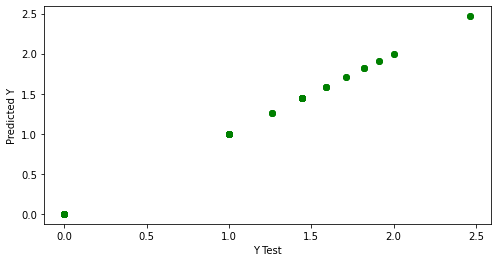

In [69]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


SUPPORT VECTOR REGRESSOR

In [70]:
fun(svr)

TRAINING:- 93.74211579232143
Testing:- 91.70485885039224
MAE 0.0897762065297339
MSE 0.02736720440925202
RMSE 0.16543036120752447
R2 Score 91.70485885039224


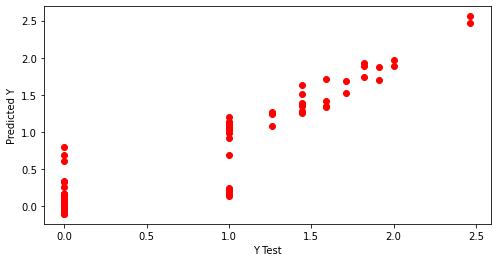

In [71]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

KNN regressor

In [72]:
fun(kn)

TRAINING:- 94.93171899764386
Testing:- 88.78218308005407
MAE 0.06926757691795304
MSE 0.03700965217309687
RMSE 0.19237892860991004
R2 Score 88.78218308005407


In [73]:
kn_pred = kn.predict(x_test)
plt.figure(figsize=(8,4))
plt.scatter(y_test,kn_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

random forest regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 99.81279631643334
Testing:- 99.0209948574298
MAE 0.019552750463858574
MSE 0.00322991898163114
RMSE 0.05683237617442315
R2 Score 99.0209948574298


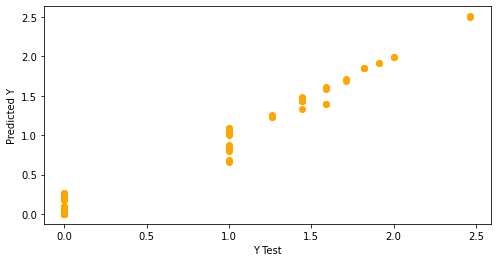

In [75]:
rd_pred= rd.predict(x_test)
rd_pred = rd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,rd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

ENSAMBLE TECHNIQUE

In [76]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 94.23704722935392
Testing:- 93.44695090228058
MAE 0.06828042514614446
MSE 0.021619720620381734
RMSE 0.14703646017359687
R2 Score 93.44695090228058


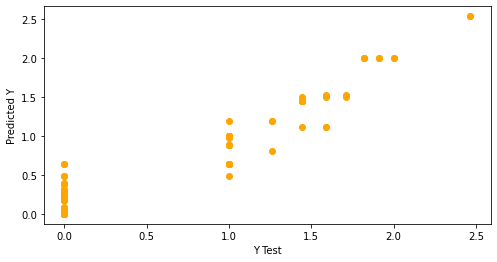

In [77]:
ad_pred= ad.predict(x_test)
ad_pred = ad_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,ad_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

GRADIENTBOOST REGRESSOR

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
fun(gd)

TRAINING:- 99.11724698512312
Testing:- 97.91185696785536
MAE 0.029962566762069362
MSE 0.006889169956940369
RMSE 0.08300102383067554
R2 Score 97.91185696785536


In [79]:
gd_pred= gd.predict(x_test)
gd_pred = gd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,gd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [80]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(svr,x_scaled,y,cv=5)
print("score of cross validation score for svr", score.mean()*100)
score=cross_val_score(dtr,x_scaled,y,cv=5)
print("score of cross validation score for dtr",score.mean()*100)
score=cross_val_score(rd,x_scaled,y,cv=5)
print("score of cross validation score for rd",score.mean()*100)
score=cross_val_score(gd,x_scaled,y,cv=5)
print("score of cross validation score for Gd",score.mean()*100)
score=cross_val_score(ad,x_scaled,y,cv=4)
print("score of cross validation score for ad",score.mean()*100)

score of cross validation score for svr 91.96824767953204
score of cross validation score for dtr 100.0
score of cross validation score for rd 99.73279683473602
score of cross validation score for Gd 98.89993379602728
score of cross validation score for ad 91.39417965590246


In [81]:
import pickle
filename='Realtime_election.pkl'
pickle.dump(dtr,open(filename,'wb'))

        Actual   Predict
250   0.000000  0.000000
785   0.000000  0.000000
230   0.000000  0.000000
830   2.000000  2.000000
132   0.000000  0.000000
762   0.000000  0.000000
721   0.000000  0.000000
905   0.000000  0.000000
1105  0.000000  0.000000
321   0.000000  0.000000
284   0.000000  0.000000
300   0.000000  0.000000
131   0.000000  0.000000
723   0.000000  0.000000
1126  0.000000  0.000000
235   0.000000  0.000000
1087  1.000000  1.000000
267   0.000000  0.000000
683   0.000000  0.000000
302   0.000000  0.000000
716   1.442250  1.442250
299   0.000000  0.000000
191   0.000000  0.000000
146   0.000000  0.000000
391   1.587401  1.587401
445   2.000000  2.000000
344   0.000000  0.000000
237   0.000000  0.000000
821   0.000000  0.000000
115   1.709976  1.709976
40    0.000000  0.000000
827   0.000000  0.000000
1211  0.000000  0.000000
884   0.000000  0.000000
1179  1.817121  1.817121
1131  0.000000  0.000000
1176  0.000000  0.000000
490   0.000000  0.000000
644   0.000000  0.000000


Text(0.5, 1.0, 'Regressor Line')

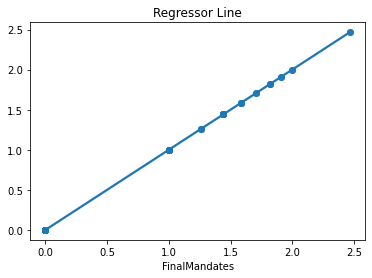

In [82]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=dtr_pred

res

print(res)
sns.regplot(y_test,dtr_pred)
plt.title('Regressor Line')

In [ ]:
THANK YOU